<a href="https://colab.research.google.com/github/swethav1618/Covid-19-tweets-classification-of-texts/blob/main/Corona_tweets_Classification_of_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Science and Machine Learning
## A Program by IITMadras and TalentSprint
### Mini Project Notebook 02 : Classification of Coronavirus Tweets using NLP Techniques.

## Objectives


* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural network (RNN, LSTM, GRU, CNNs, Bidirectional-LSTM, GRU) to classify the tweets


### Introduction

First we need to understand why sentiment analysis is needed for social media?

People from all around the world have been using social media more than ever. Sentiment analysis on social media data helps to understand the wider public opinion about certain topics such as movies, events, politics, sports, and more and gain valuable insights from this social data. Sentiment analysis has some powerful applications. Nowadays it is also used by some businesses to do market research and understand the customer’s experiences for their products or services.

Now an interesting question about this type of problem statement that may arise in your mind is that why sentiment analysis on COVID-19 Tweets? What is about the coronavirus tweets that would be positive? You may have heard sentiment analysis on movie or book reviews, but what is the purpose of exploring and analyzing this type of data?

The use of social media for communication during the time of crisis has increased remarkably over the recent years. As mentioned above, analyzing social media data is important as it helps understand public sentiment. During the coronavirus pandemic, many people took to social media to express their anger, grief, or sadness while some also spread happiness and positivity. People also used social media to ask their network for help related to vaccines or hospitals during this hard time. Many issues related to this pandemic can also be solved if experts considered this social data. That’s the reason why analyzing this type of data is important to understand the overall issues faced by people.



## Dataset

The given challenge is to build a multiclass classification model to predict the sentiment of Covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done. We are given information like Location, Tweet At, Original Tweet, and Sentiment.

The training dataset consists of 36000 tweets and the testing dataset consists of 8955 tweets. There are 5 sentiments namely ‘Positive’, ‘Extremely Positive’, ‘Negative’, ‘Extremely Negative’, and ‘Neutral’ in the sentiment column.

## Description

This dataset has the following information about the user who tweeted:

1. **UserName:** twitter handler
2. **ScreenName:** a personal identifier on Twitter and is separate from the username
3. **Location:** where in the world the person tweets from
4. **TweetAt:** date of the tweet posted (DD-MM-YYYY)
5. **OriginalTweet:** the tweet itself
6. **Sentiment:** sentiment value



## Problem Statement

To build and implement a multiclass classification deep neural network model to classify between Positive/Extremely Positive/Negative/Extremely Negative/Neutral sentiments

## Grading = 10 Marks

In [1]:
#@title Download Dataset
%%capture
!pip install --upgrade keras
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_test.csv
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_train.csv

In [2]:
!pip install tensorflow

In [3]:

# Instead of using separate imports from keras, use tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional, Dense, Dropout, Embedding, SpatialDropout1D

from tensorflow.keras.models import Sequential   # the model

## Import required packages

In [4]:
!pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)


from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
import re
import string
import nltk

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  **Data Loading and Perform Exploratory Data Analysis** (2 Points)

* Load the Dataset
  - Use encoding='ISO-8859-1' when reading csv files


In [6]:
# YOUR CODE HERE
import pandas as pd

# Load the training dataset
train_df = pd.read_csv('corona_nlp_train.csv', encoding='ISO-8859-1')

# Load the testing dataset
test_df = pd.read_csv('corona_nlp_test.csv', encoding='ISO-8859-1')

* Check for Missing Values and impute/drop them

In [7]:
# YOUR CODE HERE
# Check for missing values in the training dataset
print("Missing values in training dataset:")
print(train_df.isnull().sum())

# Check for missing values in the testing dataset
print("\nMissing values in testing dataset:")
print(test_df.isnull().sum())

# Impute missing values in 'Location' with 'Unknown'
train_df['Location'].fillna('Unknown', inplace=True)
test_df['Location'].fillna('Unknown', inplace=True)

# Drop rows with missing values in other columns (if any)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

Missing values in training dataset:
UserName            0
ScreenName          0
Location         7484
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Missing values in testing dataset:
UserName            0
ScreenName          0
Location         1982
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


/tmp/ipython-input-1470756368.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Location'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1470756368.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

* Visualize the sentiment column values


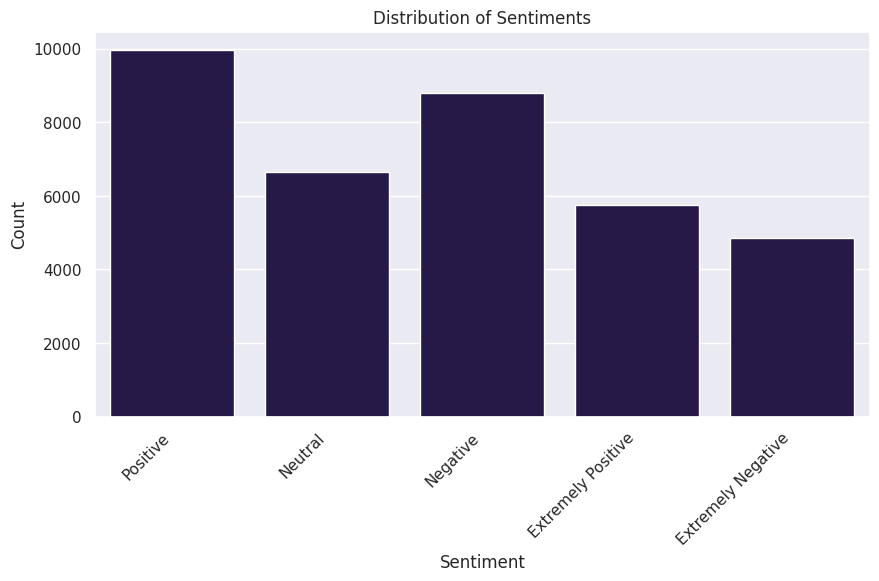

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize sentiment column values using countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='Sentiment', data=train_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Visualize top 10 Countries that had the highest tweets using countplot (Tweet count vs Location)


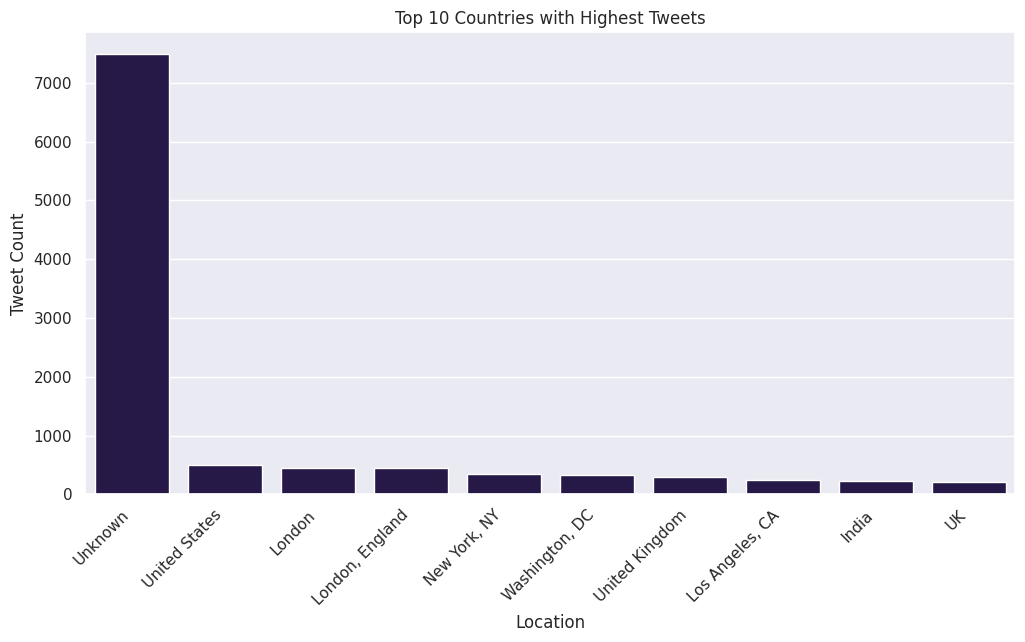

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 countries with the highest tweet counts
top_10_countries = train_df['Location'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 countries
filtered_df = train_df[train_df['Location'].isin(top_10_countries)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=filtered_df, order=top_10_countries)
plt.title('Top 10 Countries with Highest Tweets')
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Plotting Pie Chart for the Sentiments in percentage


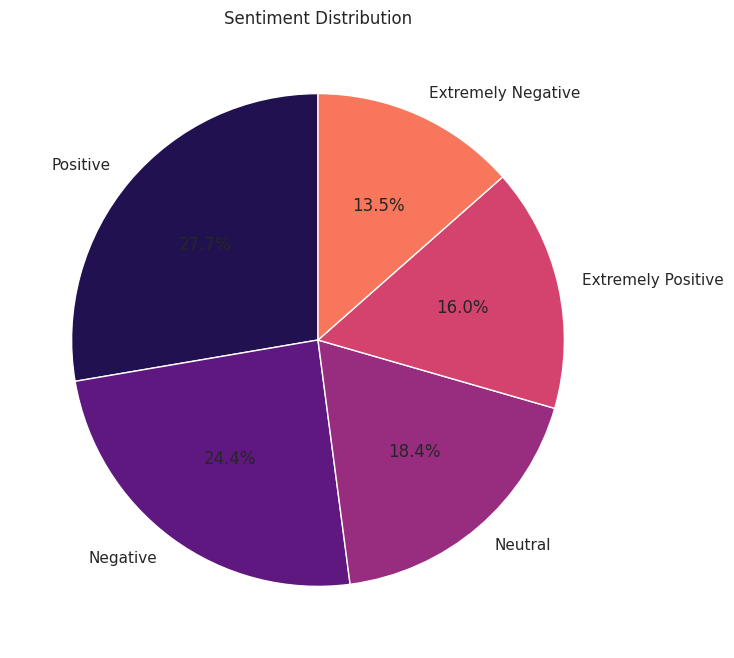

In [ ]:

import matplotlib.pyplot as plt

# Calculate sentiment percentages
sentiment_counts = train_df['Sentiment'].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

* WordCloud for the Tweets/Text

    * Visualize the most commonly used words in each sentiment using wordcloud
    * Refer to the following [link](https://medium.com/analytics-vidhya/word-cloud-a-text-visualization-tool-fb7348fbf502) for Word Cloud: A Text Visualization tool




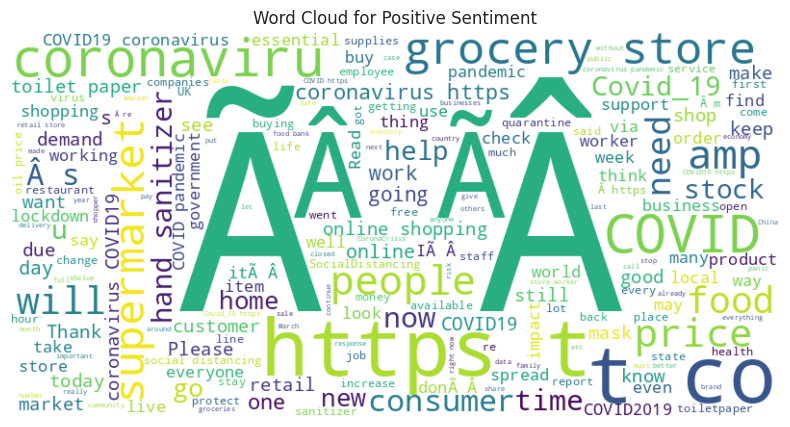

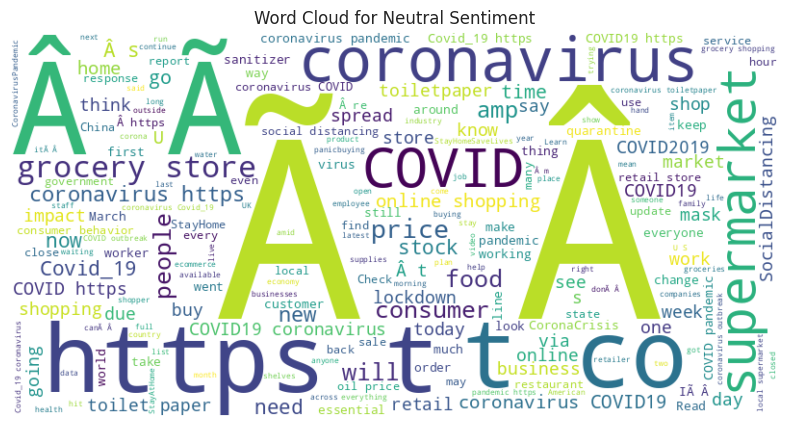

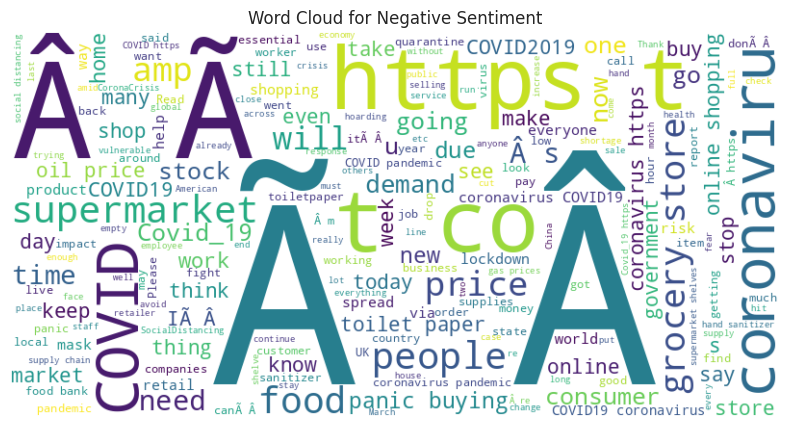

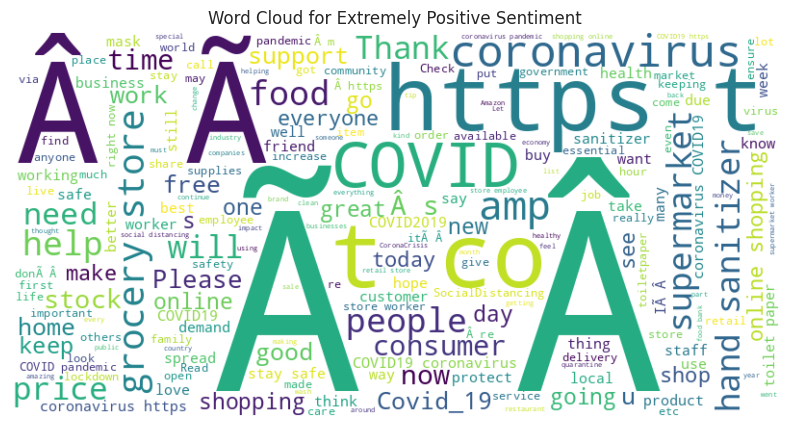

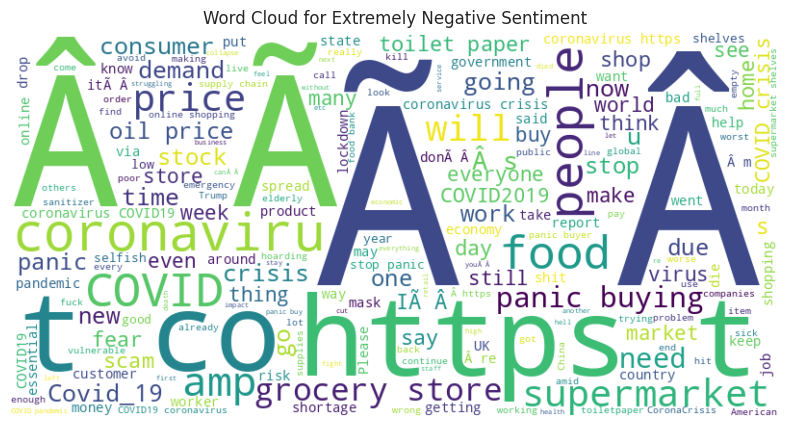

In [8]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'train_df' contains 'OriginalTweet' and 'Sentiment' columns

# Get unique sentiment values
sentiments = train_df['Sentiment'].unique()

# Create a word cloud for each sentiment
for sentiment in sentiments:
    # Filter tweets for the current sentiment
    sentiment_tweets = train_df[train_df['Sentiment'] == sentiment]['OriginalTweet'].str.cat(sep=' ')

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_tweets)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()

##   **Data Pre-Processing**  (2 Points)

####  Clean and Transform the data into a specified format

- Use regex package for cleaning the punctuations and unnecessary symbols
- Encode the categories of tweets i.e. Sentiment column of dataset
- Drop the columns which are not useful for the classification
task
- Remove stop words (Stop words are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.
- Tokenize the sentences
- Set the MAX_NB_WORDS of tokenizer method in keras
- Set MAX_SEQUENCE_LENGTH for padding/trimming sequences of fixed length
-  


In [9]:

import re
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Download stopwords if not already downloaded
nltk.download('stopwords')

def clean_text(text):
    """
    Cleans the input text by removing punctuation, URLs,
    and converting to lowercase.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    return text

# Clean the 'OriginalTweet' column in both train and test datasets
train_df['cleaned_text'] = train_df['OriginalTweet'].apply(clean_text)
test_df['cleaned_text'] = test_df['OriginalTweet'].apply(clean_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
train_df['cleaned_text'] = train_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test_df['cleaned_text'] = test_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Encode the Sentiment column
label_encoder = LabelEncoder()
train_df['Sentiment_encoded'] = label_encoder.fit_transform(train_df['Sentiment'])
test_df['Sentiment_encoded'] = label_encoder.transform(test_df['Sentiment'])

# Drop unnecessary columns
train_df = train_df[['cleaned_text', 'Sentiment_encoded']]
test_df = test_df[['cleaned_text', 'Sentiment_encoded']]

# Tokenization
MAX_NB_WORDS = 50000  # Set maximum number of words to consider
MAX_SEQUENCE_LENGTH = 100  # Set maximum sequence length for padding

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train_df['cleaned_text'])

train_sequences = tokenizer.texts_to_sequences(train_df['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['cleaned_text'])

# Padding
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Get the target variables
train_labels = train_df['Sentiment_encoded']
test_labels = test_df['Sentiment_encoded']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##   **Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation)** (3 Points)

- Download and load  word embeddings  
- Create a weight matrix for words in the training data



In [10]:
#@title Download Word embeddings

!wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/glove.6B.zip
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [11]:

import numpy as np

# Load GloVe embeddings
embeddings_index = {}
with open('glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Loaded %s word vectors.' % len(embeddings_index))

# Create weight matrix
embedding_matrix = np.zeros((MAX_NB_WORDS, 200))  # 200 is the embedding dimension
for word, i in tokenizer.word_index.items():
    if i < MAX_NB_WORDS:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


##   **Build and Train the Deep Recurrent Model using RNN/LSTM** (2 points)

- Create and Embedding layer to feed to LSTM
    - input_dim: Size of the vocabulary
    - output_dim: Dimension of the dense embedding

- The ouput of embedding layers is fed to LSTM
- Compile the model,train and tweak the hyperparameters
- Calculate the train set accuracy

In [12]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Create the model
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=200, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
# 5 output units for 5 sentiment classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on training data
_, train_accuracy = model.evaluate(train_data, train_labels, verbose=0)
print('Train Accuracy: {}'.format(train_accuracy))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 263s 558ms/step - accuracy: 0.4192 - loss: 1.3278 - val_accuracy: 0.4946 - val_loss: 1.1809
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 257s 559ms/step - accuracy: 0.4961 - loss: 1.1786 - val_accuracy: 0.5482 - val_loss: 1.0781
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 262s 559ms/step - accuracy: 0.5343 - loss: 1.1050 - val_accuracy: 0.5718 - val_loss: 1.0289
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 261s 557ms/step - accuracy: 0.5601 - loss: 1.0522 - val_accuracy: 0.5983 - val_loss: 0.9857
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 264s 561ms/step - accuracy: 0.5849 - loss: 1.0072 - val_accuracy: 0.6290 - val_loss: 0.9396
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 260s 556ms/step - accuracy: 0.6101 - loss: 0.9597 - val_accuracy: 0.6322 - val_loss: 0.9270
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 263s 557ms/step - accuracy: 0.6260 - loss: 0.9239 - val_accuracy: 0.6515 - val_loss: 0.8821
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 263s 559ms/step - accuracy: 0.6446 -

##   **Evaluate the Model and get model predictions on the test dataset** (1 Points)

* Evaluate the model on test set







In [13]:

# Evaluate the model on the test set
_, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.6888889074325562


In [14]:
# Get predictions on the test dataset
test_predictions = model.predict(test_data)

# The predictions are probabilities for each class,
# so we take the argmax to get the predicted class index
predicted_classes = np.argmax(test_predictions, axis=1)

# You can now use 'predicted_classes' for further analysis or evaluation.
# For example, you can compare it with 'test_labels' to calculate metrics
# like precision, recall, F1-score, and a confusion matrix.
print("First 10 predicted classes:", predicted_classes[:10])
print("First 10 actual classes:", test_labels[:10])

280/280 ━━━━━━━━━━━━━━━━━━━━ 47s 166ms/step
First 10 predicted classes: [4 3 4 2 3 4 1 0 4 3]
First 10 actual classes: 0    4
1    4
2    2
3    3
4    3
5    4
6    1
7    0
8    4
9    4
Name: Sentiment_encoded, dtype: int64
